In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

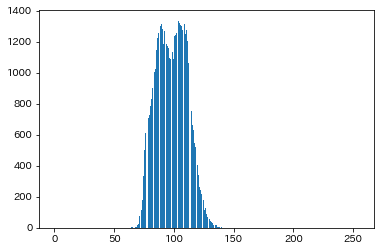

In [26]:
img = cv2.imread("../assets/imori_dark.jpg")
# Display histgram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

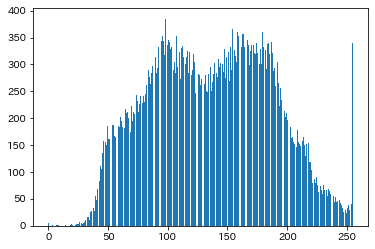

In [27]:
img2 = cv2.imread("../assets/imori.jpg")
# Display histgram
plt.hist(img2.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

In [28]:
# Normalization
def hist_normalization(img, a=0, b=255):
    
    # get Max and min
    c = img.min()
    d = img.max()
    
    out = img.copy()
    
    # normalization
    out = (b-a) / (d-c) * (out-c) + a
    out[out < a] = a
    out[out > b] = b
    out = out.astype(np.uint8)
    
    return out 

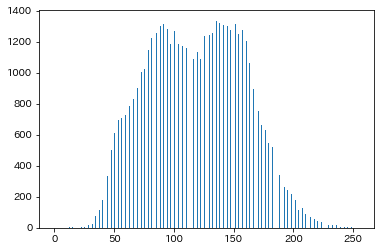

In [29]:
# Histogram normalization
out = hist_normalization(img)
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

In [30]:
# Histogram Manipulation
def hist_manipulation(img, m0=128, s0=52):
    m = np.mean(img)
    s = np.std(img)

    out = img.copy()
    
    # Normalization
    out = s0 / s * (out-m) + m0
    out[out < 0] = 0
    out[out > 255] = 255
    out = out.astype(np.uint8)

    return out

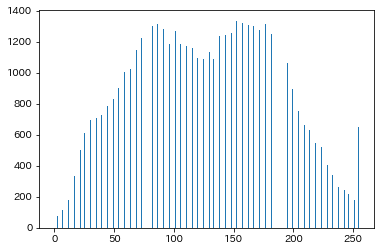

In [31]:
# Histgram manipulation
out = hist_manipulation(img, m0=128, s0=60)
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

In [32]:
# Histgram equalization
def hist_equalization(img, z_max=255):
    h, w, ch = img.shape
    s = h * w * ch * 1
    
    out = img.copy()
    
    sum_h = 0
    
    for i in range(1, 255):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / s * sum_h
        out[ind] = z_prime
        
    out = out.astype(np.uint8)
    
    return out

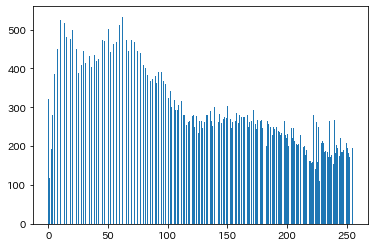

In [37]:
# Histogram equalization
out = hist_equalization(img2)
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

In [55]:
# Gamma correction
def gamma_correction(img, c=1, g=2.2):
    out = img.copy()
    out /= 255
    
    # x = c * (img ** g)
    out = (1/c * out) ** (1/g)
    
    out *= 255
    out = out.astype(np.uint8)
    
    return out

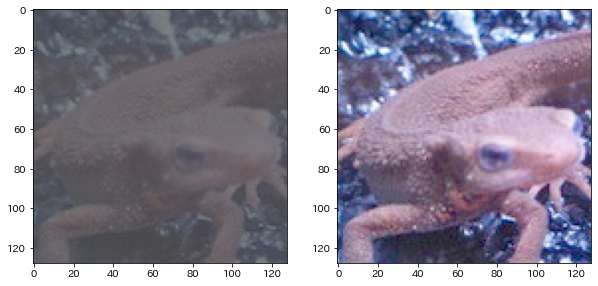

In [59]:
img2 = cv2.imread("../assets/imori_gamma.jpg").astype(np.float)
# Gamma correction
out =  gamma_correction(img2)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(out[:,:,::-1])